# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

 ### Reminder: Predictions and modeling should be in separate notebooks!

## Step 1: Read in Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
import scipy.stats as stats
import math

pd.set_option('display.max_columns', 100, 'display.max_rows', 1000)

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [3]:
df = pd.read_csv("kc_house_data_train.csv")
print(df.shape)
df.head()

(17290, 22)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [4]:
df.sample(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13072,13072,323079058,20150105T000000,850000.0,4,3.75,3890,22000,2.0,0,0,3,10,3890,0,2007,0,98027,47.5052,-121.906,1610,23142
6126,6126,9191201250,20150107T000000,580000.0,5,2.00,2600,3750,1.5,0,0,4,6,1400,1200,1914,0,98105,47.6691,-122.299,1700,3750
2276,2276,2215450150,20140530T000000,322000.0,4,2.50,2280,7200,2.0,0,0,3,8,2280,0,1994,0,98030,47.3829,-122.207,2250,7200
10266,10266,5457300696,20140627T000000,700000.0,3,2.50,1660,1545,2.0,0,2,3,9,1400,260,2002,0,98109,47.6268,-122.353,1820,2570
10204,10204,7950303290,20150402T000000,499950.0,3,1.75,2060,3500,1.0,0,0,5,7,1030,1030,1951,0,98118,47.5635,-122.282,1110,6000
14649,14649,40000669,20150319T000000,499950.0,4,2.50,2910,20067,2.0,0,0,3,9,2910,0,2001,0,98168,47.4714,-122.273,1730,21420
8031,8031,3223039149,20140709T000000,395000.0,4,2.75,1970,37026,1.0,0,0,4,8,1970,0,1961,0,98070,47.4375,-122.446,1970,51836
4624,4624,1721801025,20140718T000000,210000.0,2,1.00,1040,4590,1.0,0,0,3,7,1040,0,1954,0,98146,47.5078,-122.337,1040,6120
2368,2368,7262200150,20150121T000000,315000.0,2,1.00,970,18557,1.0,0,0,3,6,970,0,1939,0,98146,47.5116,-122.370,1150,7200
14906,14906,2867100005,20150407T000000,710000.0,2,1.00,1700,3040,1.5,0,0,3,8,1460,240,1914,0,98119,47.6442,-122.369,1620,3230


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     17290 non-null  int64  
 1   id             17290 non-null  int64  
 2   date           17290 non-null  object 
 3   price          17290 non-null  float64
 4   bedrooms       17290 non-null  int64  
 5   bathrooms      17290 non-null  float64
 6   sqft_living    17290 non-null  int64  
 7   sqft_lot       17290 non-null  int64  
 8   floors         17290 non-null  float64
 9   waterfront     17290 non-null  int64  
 10  view           17290 non-null  int64  
 11  condition      17290 non-null  int64  
 12  grade          17290 non-null  int64  
 13  sqft_above     17290 non-null  int64  
 14  sqft_basement  17290 non-null  int64  
 15  yr_built       17290 non-null  int64  
 16  yr_renovated   17290 non-null  int64  
 17  zipcode        17290 non-null  int64  
 18  lat   

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)


In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [8]:
df.groupby('waterfront')['price'].mean()

waterfront
0    5.315051e+05
1    1.688486e+06
Name: price, dtype: float64

In [9]:
df.corr().loc['waterfront','price']

0.2757786708046838

In [10]:
print(df['bedrooms'].quantile(.999))
print(df['bedrooms'].quantile(.001))

8.0
1.0


In [11]:
df[df['bedrooms'] > 8]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2356,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
3425,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
3680,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
8207,8823900290,20150317T000000,1400000.0,9,4.00,4620,5508,2.5,0,0,3,11,3870,750,1915,0,98105,47.6684,-122.309,2710,4320
8446,8823901445,20150313T000000,934000.0,9,3.00,2820,4480,2.0,0,0,3,7,1880,940,1918,0,98105,47.6654,-122.307,2460,4400
8597,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
8624,1997200215,20140507T000000,599999.0,9,4.50,3830,6988,2.5,0,0,3,7,2450,1380,1938,0,98103,47.6927,-122.338,1460,6291
11181,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
14156,2902200015,20150106T000000,700000.0,9,3.00,3680,4400,2.0,0,0,3,7,2830,850,1908,0,98102,47.6374,-122.324,1960,2450
17114,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914


<AxesSubplot:>

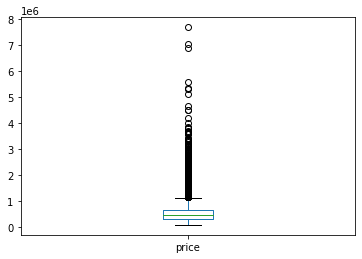

In [12]:
df['price'].plot(kind='box')

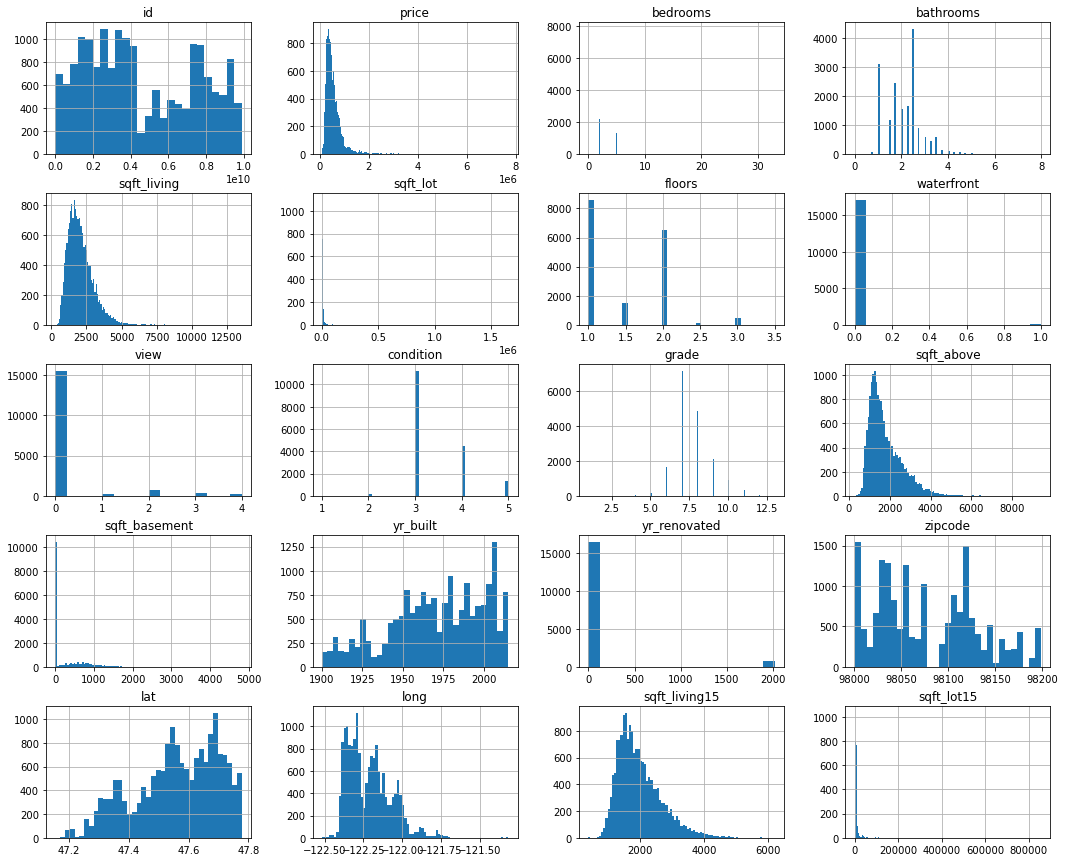

In [13]:
df.hist(figsize=(18,15), bins='auto');

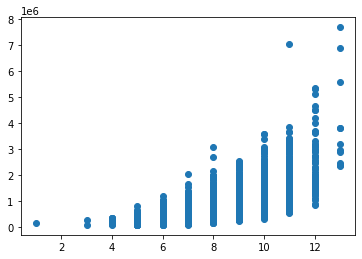

In [14]:
plt.scatter(x=df.grade,y = df.price)
plt.show()

<AxesSubplot:xlabel='grade'>

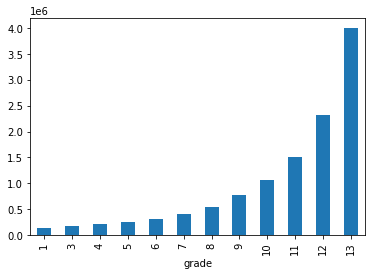

In [15]:
df.groupby('grade')['price'].mean().plot(kind='bar')


In [16]:
df[['lat','long','price']]

,lat,long,price
0,47.4388,-122.162,365000.0
1,47.6784,-122.285,865000.0
2,47.5646,-122.129,1038000.0
3,47.6995,-122.228,1490000.0
4,47.6647,-122.083,711000.0
...,...,...,...
17285,47.5858,-122.112,750000.0
17286,47.6687,-122.288,440000.0
17287,47.7635,-122.262,310000.0
17288,47.4199,-121.990,427500.0


In [17]:
df['lat_long'] = list(zip(df['lat'],df['long']))
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lat_long
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,"(47.4388, -122.162)"
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,"(47.6784, -122.285)"
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,"(47.5646, -122.129)"
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,"(47.6995, -122.228)"
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,"(47.6647, -122.083)"


In [18]:
df[['lat_long','price']].describe()

,price
count,1.729000e+04
mean,5.407395e+05
std,3.733190e+05
min,7.500000e+04
25%,3.210000e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


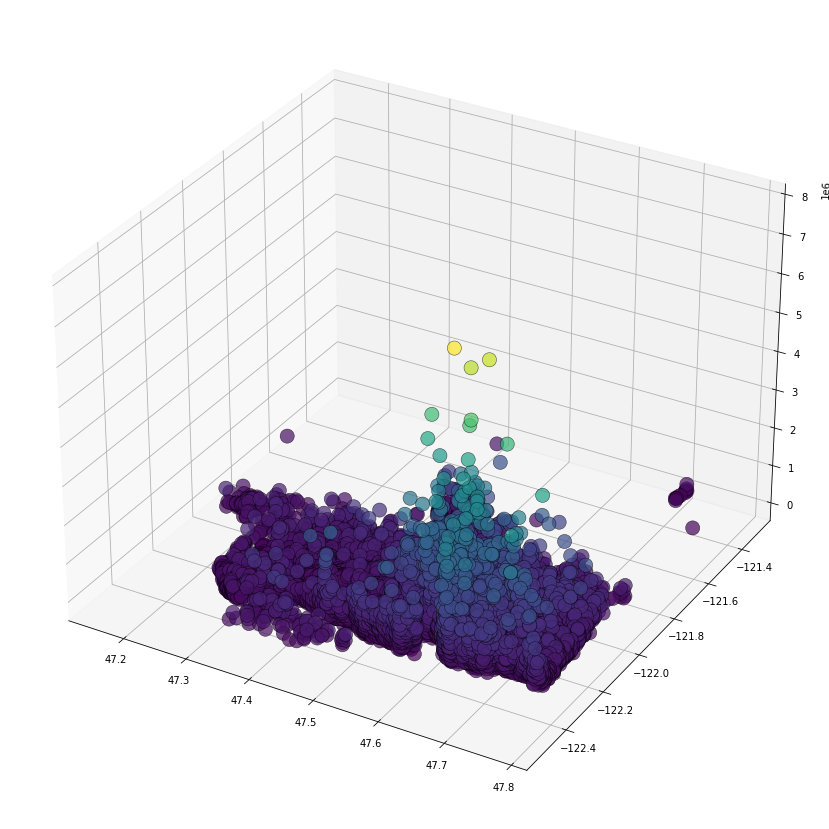

In [19]:
from mpl_toolkits.mplot3d import Axes3D

x = df['lat']
y = df['long']
z = df['price']
 

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=.5, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.show()

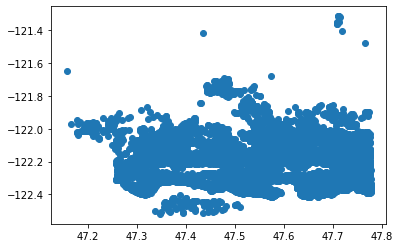

In [20]:
plt.scatter(df.lat, df.long)
plt.show()

In [21]:
# from shapely.geometry import Point, Polygon
# import geopandas as gpd
# from geopandas import GeoDataFrame
# import descartes
# crs = {'init': 'epsg:4326'}

# geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
# # gdf = GeoDataFrame(df, geometry=geometry)   

# geo_df = gpd.GeoDataFrame(df,
#                           crs=crs,
#                           geometry= geometry)

# #this is a simple map that goes with geopandas
# street_map = gpd.read_file('/Users/sandrawelbeck/Desktop/Flatiron_DS_Bootcamp/nyc-mhtn-ds-102620-lectures/Phase_2/Phase2_project/tl_2017_53033_roads/tl_2017_53033_roads.shp')
# fig, ax = plt.subplots(figsize = (15,15))

# geo_df.plot(ax=ax, markersize=20, color='blue', marker = 'o', label = "Long,Lat")
# street_map.plot(ax=ax, alpha = 0.4, color="grey")
# # geo_df[geo_df['WnvPresent']==1].plot(ax=ax, markersize=20, color=red, marker = '^', label = "Pos")
# plt.legend(prop={'size':15})

# # world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# # gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [22]:
leave_out = ['id','date','month','year','price','geometry','lat_long']
for_plot = [x for x in df.columns if x not in leave_out]

In [23]:
for_plot

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

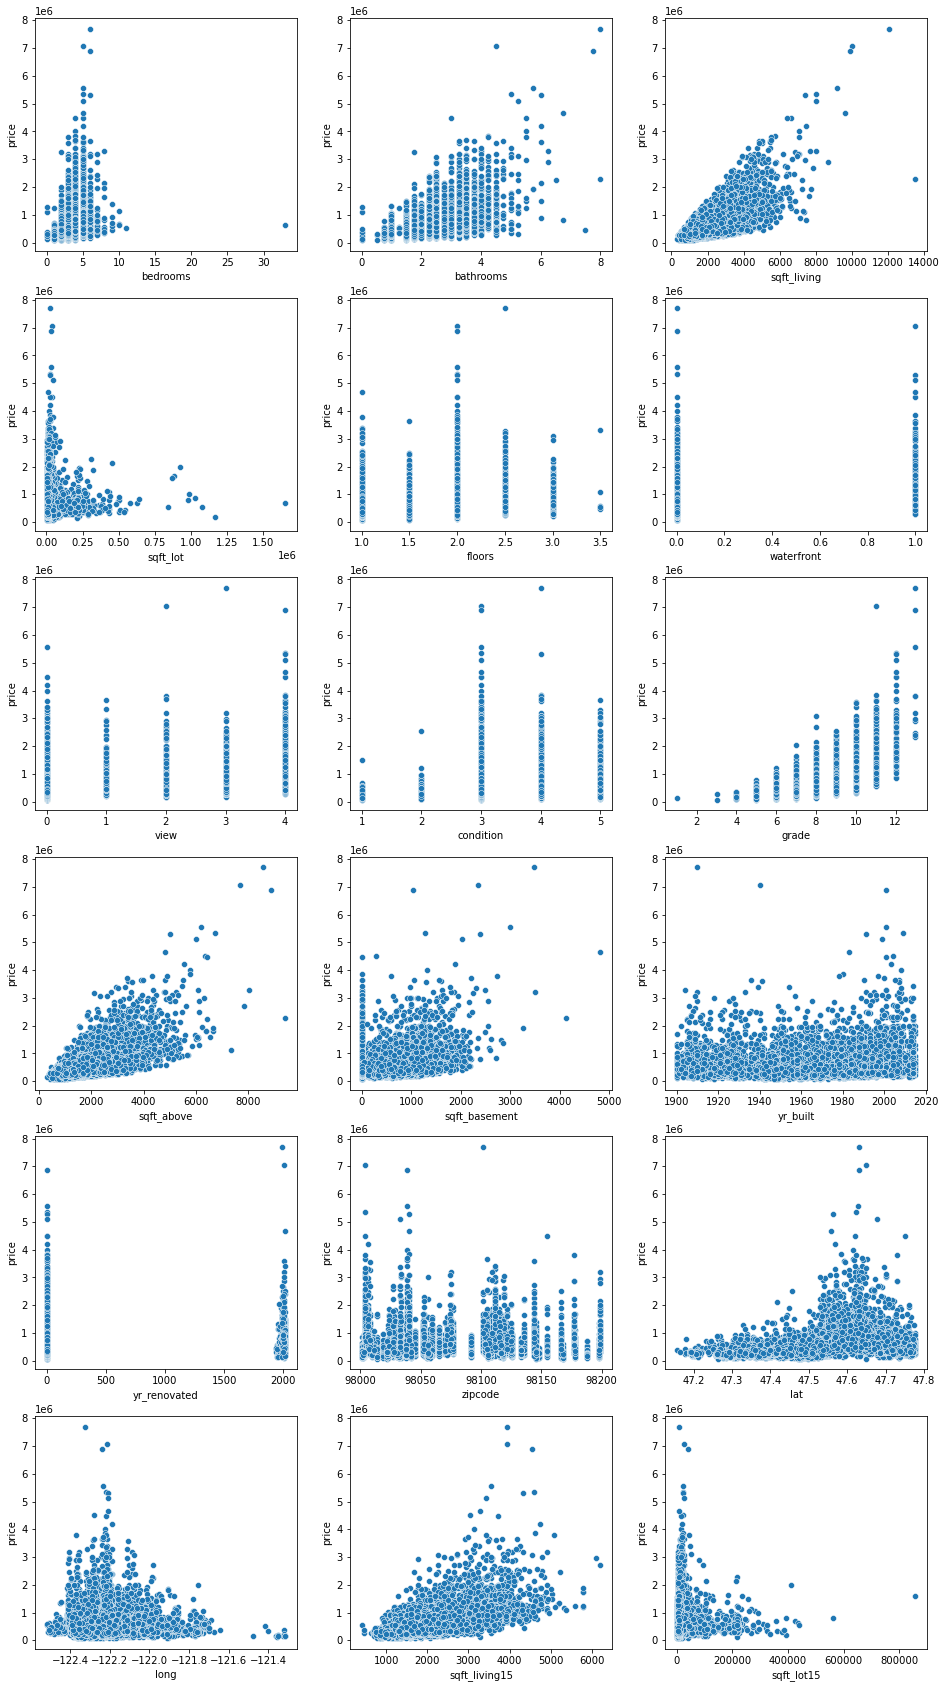

In [24]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16,30))

for i, column in enumerate(for_plot):
    sns.scatterplot(data=df, x=column, y='price', ax=axes[i//3, i%3])

(20.5, -0.5)

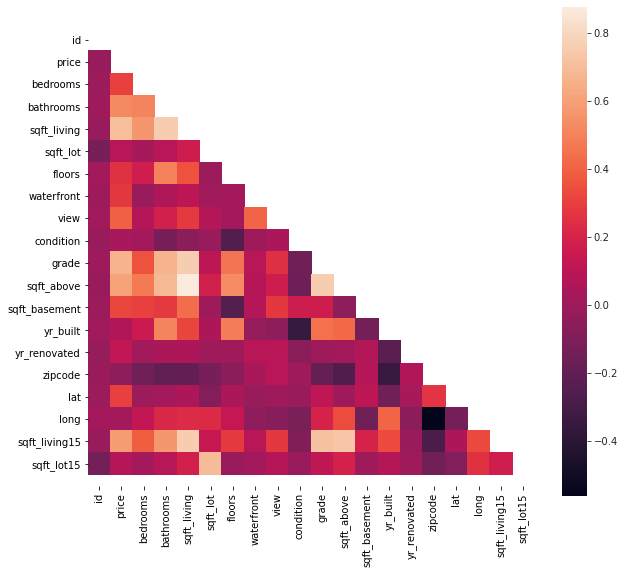

In [25]:
# Set up  matplotlib figure (might have to play around with the 
# figsize if your labels aren't so legible and you don't want
# to mess with the labels using matplotlib)
f, ax = plt.subplots(figsize=(10, 9))

# Create an upper triangular matrix to use to get rid of duplicate/
# useless values
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr(), mask=mask, square=True)
    
# fix for mpl bug that cuts off top/bottom of seaborn viz
# credit: https://github.com/mwaskom/seaborn/issues/1773 SalMac86's post
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
# plt.show() # ta-da!

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [26]:
df[(df['bathrooms']==0) & (df['bedrooms']==0)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lat_long
483,3374500520,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,"(47.4095, -122.168)"
1120,6306400140,20140612T000000,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,"(47.6362, -122.322)"
3032,7849202190,20141223T000000,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,"(47.5265, -121.828)"
5424,3918400017,20150205T000000,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,"(47.7145, -122.356)"
9286,2954400190,20140624T000000,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,"(47.6642, -122.069)"
10067,3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850,"(47.5308, -121.888)"


In [27]:
#Replace 33 bedrooms with 3 as it was a typo
df['bedrooms'] = df['bedrooms'].replace({33:3})

In [28]:
df[(df['yr_renovated']==0) & (df['yr_built']==1990)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lat_long
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,"(47.6995, -122.228)"
113,6792100090,20140914T000000,683000.0,4,2.50,2620,10489,2.0,0,0,3,9,2620,0,1990,0,98052,47.6732,-122.143,2430,7701,"(47.6732, -122.143)"
257,4123830480,20140610T000000,392000.0,4,2.75,1940,6555,2.0,0,0,3,8,1940,0,1990,0,98038,47.3701,-122.041,1840,6912,"(47.3701, -122.041)"
288,3432500705,20141021T000000,410000.0,4,2.25,2200,8292,2.0,0,0,3,7,2200,0,1990,0,98155,47.7456,-122.315,1090,8290,"(47.7456, -122.315)"
308,1796370590,20150305T000000,255000.0,3,2.00,1490,7599,1.0,0,0,3,7,1490,0,1990,0,98042,47.3687,-122.088,1560,7710,"(47.3687, -122.088)"
315,4137000280,20150222T000000,264500.0,3,2.50,1630,8346,1.0,0,0,3,8,1630,0,1990,0,98092,47.2622,-122.219,2110,8619,"(47.2622, -122.219)"
479,6837820330,20150429T000000,300000.0,4,2.50,2450,8932,2.0,0,0,3,8,2450,0,1990,0,98023,47.3093,-122.345,2410,8775,"(47.3093, -122.345)"
483,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,"(47.4095, -122.168)"
737,6899990200,20140702T000000,720000.0,4,3.00,3550,12327,1.5,0,0,4,10,2180,1370,1990,0,98011,47.7533,-122.205,3170,12937,"(47.7533, -122.205)"
878,2312400200,20150102T000000,247000.0,3,2.50,1510,10875,1.0,0,0,3,7,1150,360,1990,0,98003,47.3482,-122.300,1810,9916,"(47.3482, -122.3)"


In [29]:
#Create new yr_renovated column removing 0 values in yr_renovated column to an actual year(yr_built)
df['yr_renovated2'] = np.where(df['yr_renovated']==0, df['yr_built'], df['yr_renovated'])

In [30]:
#Change date column to datetime type and create two additional columns for month and year sold
df['date'] = pd.to_datetime(df['date']) #turn date column to date type
df['month'] = pd.DatetimeIndex(df.loc[:,'date']).month #Create month column
df['year'] = pd.DatetimeIndex(df.loc[:,'date']).year #create year column

In [31]:
df.groupby('year')['month'].value_counts()

year  month
2014  7        1761
      6        1753
      8        1561
      10       1493
      5        1423
      9        1388
      12       1170
      11       1154
2015  4        1804
      3        1496
      2         990
      1         792
      5         505
Name: month, dtype: int64

In [32]:
#keep
# df['bathrooms'] = df['bathrooms'].replace(0,df['bathrooms'].median())
# df['bedrooms'] = df['bedrooms'].replace(0,df['bedrooms'].median())
df[df['bathrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lat_long,yr_renovated2,month,year
483,3374500520,2015-04-29,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,"(47.4095, -122.168)",1990,4,2015
1120,6306400140,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,"(47.6362, -122.322)",1990,6,2014
3032,7849202190,2014-12-23,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,"(47.5265, -121.828)",1996,12,2014
5424,3918400017,2015-02-05,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,"(47.7145, -122.356)",2006,2,2015
9060,3421079032,2015-02-17,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882,"(47.2638, -121.906)",1966,2,2015
9286,2954400190,2014-06-24,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,"(47.6642, -122.069)",1990,6,2014
10067,3980300371,2014-09-26,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850,"(47.5308, -121.888)",1963,9,2014
12982,203100435,2014-09-18,484000.0,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290,"(47.6429, -121.955)",1948,9,2014


In [33]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated2,month,year
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.370735,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824,1973.158010,6.570561,2014.323135
std,2.874656e+09,3.733190e+05,0.911923,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583,28.805976,3.116999,0.467687
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000,1900.000000,1.000000,2014.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000,1954.000000,4.000000,2014.000000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000,1977.000000,6.000000,2014.000000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000,1999.000000,9.000000,2015.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000,2015.000000,12.000000,2015.000000


In [34]:
df[['yr_built','yr_renovated']]

,yr_built,yr_renovated
0,1986,0
1,1977,0
2,1997,0
3,1990,0
4,2004,0
...,...,...
17285,1958,0
17286,1948,0
17287,1953,0
17288,1971,0


In [35]:
df.corr().loc['sqft_living','sqft_living15']

0.7550658985518917

In [36]:
df.corr().loc['sqft_lot','sqft_lot15']

0.701875229248093

In [37]:
df.corr().loc['sqft_living','price']

0.7035403039789652

In [38]:
df.corr(method='pearson')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated2,month,year
id,1.000000,-0.015644,-0.000143,0.003833,-0.014251,-0.129837,0.017126,0.000101,0.012594,-0.014272,0.003163,-0.013932,-0.003516,0.013697,-0.019560,-0.008166,-0.001865,0.017388,-0.007494,-0.139605,0.008698,-0.014844,0.012953
price,-0.015644,1.000000,0.313775,0.524335,0.703540,0.086803,0.256985,0.275779,0.395485,0.036099,0.666215,0.607760,0.323312,0.056450,0.117770,-0.048958,0.302394,0.019327,0.585567,0.081423,0.104812,-0.004350,-0.002334
bedrooms,-0.000143,0.313775,1.000000,0.524033,0.588536,0.030674,0.179908,-0.008668,0.082724,0.021376,0.366405,0.488420,0.307873,0.159936,0.014489,-0.152831,-0.003991,0.129593,0.401073,0.028038,0.168762,0.002985,-0.010211
bathrooms,0.003833,0.524335,0.524033,1.000000,0.755270,0.085470,0.497967,0.065848,0.188817,-0.122976,0.664191,0.686853,0.282700,0.507761,0.048140,-0.201527,0.023074,0.221308,0.568080,0.086499,0.536815,0.012950,-0.030045
sqft_living,-0.014251,0.703540,0.588536,0.755270,1.000000,0.166810,0.357169,0.109738,0.283336,-0.061530,0.762929,0.876696,0.435529,0.319397,0.051448,-0.195893,0.052646,0.234453,0.755066,0.179570,0.342839,0.017737,-0.033606
sqft_lot,-0.129837,0.086803,0.030674,0.085470,0.166810,1.000000,-0.002205,0.015356,0.073058,-0.013715,0.110320,0.180755,0.008065,0.054228,0.004520,-0.126590,-0.082029,0.226190,0.136959,0.701875,0.052918,-0.001722,0.003141
floors,0.017126,0.256985,0.179908,0.497967,0.357169,-0.002205,1.000000,0.025132,0.025883,-0.259230,0.458984,0.528509,-0.247481,0.483657,0.005985,-0.060560,0.048227,0.128795,0.283933,-0.008170,0.498899,0.019629,-0.024641
waterfront,0.000101,0.275779,-0.008668,0.065848,0.109738,0.015356,0.025132,1.000000,0.407565,0.009608,0.092234,0.077162,0.083433,-0.021981,0.094268,0.034282,-0.013331,-0.042728,0.091090,0.026895,0.005262,0.005685,-0.000824
view,0.012594,0.395485,0.082724,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000,0.045060,0.249554,0.164747,0.279939,-0.049593,0.091291,0.089475,0.003820,-0.077572,0.279999,0.073185,-0.020531,-0.004189,0.000701
condition,-0.014272,0.036099,0.021376,-0.122976,-0.061530,-0.013715,-0.259230,0.009608,0.045060,1.000000,-0.142066,-0.157466,0.166923,-0.358921,-0.060969,0.007068,-0.009927,-0.109200,-0.094307,-0.007125,-0.392758,0.017099,-0.044871


## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

In [39]:
df['yrs_since_built'] = 2020 - df['yr_built']

In [40]:
df['yrs_since_reno'] = 2020 - df['yr_renovated2']

In [41]:
df['yrs_btwn_built_reno'] = df['yr_renovated2'] - df['yr_built']

In [42]:
df['property_age'] = df['year'] - df['yr_built']

In [43]:
df['has_basement'] = np.where(df['sqft_basement']==0, 0, 1)

In [44]:
df['grade_exp'] = np.exp(df['grade'])

In [45]:
df.groupby('zipcode')['price'].mean().sort_values(ascending=False)

zipcode
98039    2.202790e+06
98004    1.396883e+06
98040    1.183018e+06
98112    1.119458e+06
98102    9.336715e+05
98109    8.759879e+05
98119    8.712724e+05
98105    8.687880e+05
98006    8.494588e+05
98005    8.088476e+05
98033    8.027175e+05
98075    7.939692e+05
98199    7.871469e+05
98074    6.912549e+05
98053    6.773342e+05
98077    6.768898e+05
98177    6.552490e+05
98052    6.460591e+05
98008    6.407492e+05
98144    6.213533e+05
98122    6.192377e+05
98029    6.156723e+05
98116    6.150221e+05
98115    6.137439e+05
98027    6.072946e+05
98007    5.975536e+05
98024    5.909915e+05
98103    5.897893e+05
98107    5.834824e+05
98117    5.701880e+05
98072    5.667307e+05
98136    5.659156e+05
98065    5.272174e+05
98034    5.238643e+05
98070    4.956727e+05
98059    4.943730e+05
98011    4.906393e+05
98166    4.793758e+05
98125    4.752226e+05
98028    4.684170e+05
98014    4.562057e+05
98045    4.313185e+05
98019    4.284222e+05
98126    4.250761e+05
98010    4.248736e+05
98

In [46]:
df.groupby('zipcode')['price'].mean().describe()

count    7.000000e+01
mean     5.627514e+05
std      3.079475e+05
min      2.322865e+05
25%      3.547935e+05
50%      4.950228e+05
75%      6.447316e+05
max      2.202790e+06
Name: price, dtype: float64

In [47]:
df.groupby('zipcode')['price'].mean().quantile(.8)

680118.32491896

In [48]:
# df[(df['yr_renovated2']==1900) & (df['yrs_since_reno']==5)]
df.groupby('yrs_since_reno')['price'].mean().sort_values(ascending=False)
df.groupby('grade_exp')['price'].mean().sort_values(ascending=False)
df.groupby('has_basement')['price'].mean().sort_values(ascending=False)

has_basement
1    622734.178960
0    487510.298932
Name: price, dtype: float64

<AxesSubplot:xlabel='property_age', ylabel='price'>

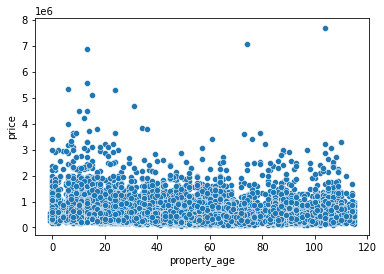

In [49]:
sns.scatterplot(data=df,x=df['property_age'],y='price')

In [50]:
df.groupby('yrs_since_built')['price'].mean().sort_values(ascending=False)

yrs_since_built
87     823574.074074
115    785712.631579
19     764142.325490
5      760906.034483
111    717651.906667
6      691102.339956
20     685785.081871
118    676645.454545
7      673810.053254
110    672368.089286
113    670511.365385
84     670441.666667
114    669378.013699
89     667079.347826
93     661942.340000
29     652368.163842
12     639025.693950
14     637061.416910
109    635523.214286
21     635102.009259
23     626838.690647
94     625982.172185
99     625936.129032
92     620863.761905
13     616687.561194
108    613817.388060
95     610158.633094
24     609102.044586
81     602660.134146
116    599607.055556
80     597595.931624
83     596409.468085
16     596023.075000
22     594461.282723
104    590811.903226
106    589636.292683
120    588646.242857
32     585161.305164
107    584966.000000
98     584296.540541
15     582505.264535
97     579694.954545
25     579332.304965
105    577701.166667
96     573463.423423
91     570868.904762
17     569813.0415

<AxesSubplot:xlabel='yrs_since_built', ylabel='price'>

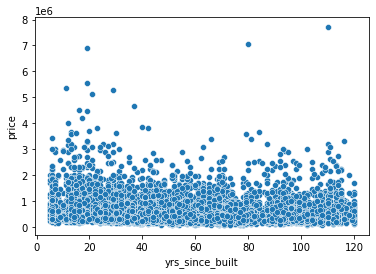

In [51]:
sns.scatterplot(data=df,x=df['yrs_since_built'],y='price')

In [52]:
df['yrs_btwn_built_reno'].describe()

count    17290.000000
mean         2.365992
std         12.307759
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        114.000000
Name: yrs_btwn_built_reno, dtype: float64

In [53]:
leave_out = ['id','date','month','year','price','geometry','lat_long']
for_plot = [x for x in df.columns if x not in leave_out]

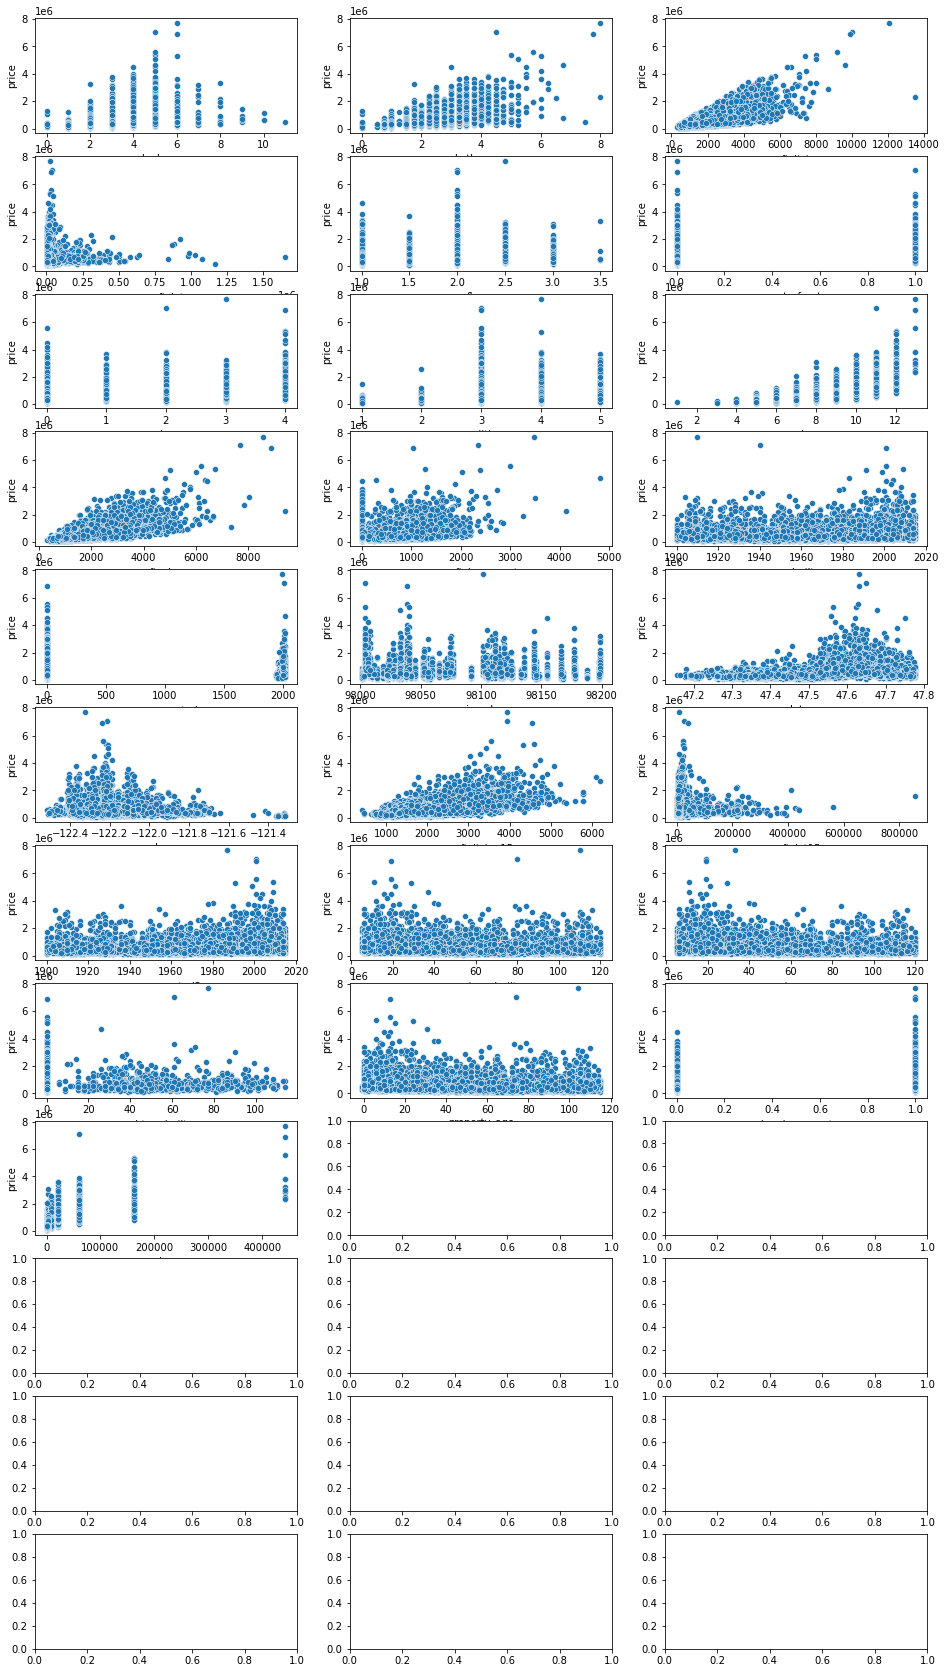

In [54]:
fig, axes = plt.subplots(nrows=12, ncols=3, figsize=(16,30))

for i, column in enumerate(for_plot):
    sns.scatterplot(data=df, x=column, y='price', ax=axes[i//3, i%3])

In [55]:
mlr_model = ols(formula='price~grade+condition+sqft_living+bathrooms', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     5263.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:23:08   Log-Likelihood:            -2.3948e+05
No. Observations:               17290   AIC:                         4.790e+05
Df Residuals:                   17285   BIC:                         4.790e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.667e+05   1.95e+04    -44.517      0.000   -9.05e+05   -8.29e+05
grade        1.108e+05   2587.361     42.832      0.000    1.06e+05    1.16e+05
condition    6.174e+04   2977.245     20.739      0.000    5.59e+04    6.76e+04
sqft_living   201.2330      3.760     53.519      0.000     193.863     208.603
bathrooms   -3.324e+04   3875.175     -8.577      0.000   -4.08e+04   -2.56e+04
==============================================================================
Omnibus:                    14397.747   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1037713.310
Skew:                           3.560   Prob(JB):                         0.00
Kurtosis:                      40.279   Cond. No.                     2.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [56]:
df.groupby('zipcode')['price'].mean().describe()

count    7.000000e+01
mean     5.627514e+05
std      3.079475e+05
min      2.322865e+05
25%      3.547935e+05
50%      4.950228e+05
75%      6.447316e+05
max      2.202790e+06
Name: price, dtype: float64

In [57]:
df.groupby('zipcode')['price'].mean().sort_values(ascending = False).head(10)

zipcode
98039    2.202790e+06
98004    1.396883e+06
98040    1.183018e+06
98112    1.119458e+06
98102    9.336715e+05
98109    8.759879e+05
98119    8.712724e+05
98105    8.687880e+05
98006    8.494588e+05
98005    8.088476e+05
Name: price, dtype: float64

In [58]:
dummy_zip = pd.get_dummies(df['zipcode'], drop_first=False)
dummy_zip.reset_index(inplace=True)
dummy_zip = dummy_zip.add_prefix("{}#".format('zipcode'))
dummy_zip = dummy_zip[['zipcode#98004','zipcode#98102','zipcode#98109','zipcode#98112','zipcode#98039','zipcode#98040','zipcode#98119', 'zipcode#98105','zipcode#98006','zipcode#98005']]

In [59]:
df.drop('zipcode', axis=1, inplace=True)
df = df.join(dummy_zip)

In [60]:
dummy_grade = pd.get_dummies(df['grade'])
dummy_grade = dummy_grade.add_prefix("{}#".format('grade'))
df = df.join(dummy_grade)

In [61]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,lat_long,yr_renovated2,month,year,yrs_since_built,yrs_since_reno,yrs_btwn_built_reno,property_age,has_basement,grade_exp,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040,zipcode#98119,zipcode#98105,zipcode#98006,zipcode#98005,grade#1,grade#3,grade#4,grade#5,grade#6,grade#7,grade#8,grade#9,grade#10,grade#11,grade#12,grade#13
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,47.4388,-122.162,2390,7700,"(47.4388, -122.162)",1986,10,2014,34,34,0,28,0,2980.957987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,"(47.6784, -122.285)",1977,8,2014,43,43,0,37,1,2980.957987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,47.5646,-122.129,3710,9685,"(47.5646, -122.129)",1997,8,2014,23,23,0,17,0,59874.141715,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,47.6995,-122.228,4050,14226,"(47.6995, -122.228)",1990,3,2015,30,30,0,25,0,162754.791419,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,47.6647,-122.083,2250,4050,"(47.6647, -122.083)",2004,7,2014,16,16,0,10,0,8103.083928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [62]:
# dummy_zip = dummy_zip[['zip#98039','zip#98004','zip#98040','zip#98112','zip#98102','zip#98109','zip#98119','zip#98105','zip#98006','zip#98005']]

In [63]:
# df['grade'].value_counts()

### OneHotEncoder

In [64]:
# df.info()

In [65]:
# from numpy import array
# from numpy import argmax
# from sklearn.preprocessing import LabelEncoder

In [66]:
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(np.array(df['zipcode']))
# len(integer_encoded)

In [67]:
# from sklearn.preprocessing import OneHotEncoder

# onehotencoder = OneHotEncoder(sparse=False) #instantiate
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# onehot_encoded = onehotencoder.fit_transform(integer_encoded)
# onehot_encoded
# encoder_zip= onehotencoder.fit_transform(df['zipcode']).toarray() #fit & transform 'x' variables 'housing_cat'

In [68]:
# inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
# print(inverted)

In [69]:
# encoder_zip #output is a sparse matrix
# # optional to change matrix to array:
# # encoder_df.toarray()

In [70]:
# Add columns back together with np.c_
# X = np.c_[(df, onehot_encoded)]

In [71]:
# X

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [72]:
#your code here
df['yrs_since_sold'] = 2020 - df['year']

In [73]:
df['yrs_since_sold'].value_counts()

6    11703
5     5587
Name: yrs_since_sold, dtype: int64

In [74]:
df.groupby('yrs_since_sold')['price'].mean()

yrs_since_sold
5    539478.438518
6    541341.601299
Name: price, dtype: float64

In [75]:
df.corr().loc['yrs_since_sold','price']

0.0023341364213541344

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [76]:
#your code here 

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [77]:
# your code here
df['sqft_living_lot']= df['sqft_living']*df['sqft_lot']

In [78]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,lat_long,yr_renovated2,month,year,yrs_since_built,yrs_since_reno,yrs_btwn_built_reno,property_age,has_basement,grade_exp,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040,zipcode#98119,zipcode#98105,zipcode#98006,zipcode#98005,grade#1,grade#3,grade#4,grade#5,grade#6,grade#7,grade#8,grade#9,grade#10,grade#11,grade#12,grade#13,yrs_since_sold,sqft_living_lot
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,47.4388,-122.162,2390,7700,"(47.4388, -122.162)",1986,10,2014,34,34,0,28,0,2980.957987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,18408510
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,"(47.6784, -122.285)",1977,8,2014,43,43,0,37,1,2980.957987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,19517000
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,47.5646,-122.129,3710,9685,"(47.5646, -122.129)",1997,8,2014,23,23,0,17,0,59874.141715,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,6,41066610
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,47.6995,-122.228,4050,14226,"(47.6995, -122.228)",1990,3,2015,30,30,0,25,0,162754.791419,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,66612480
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,47.6647,-122.083,2250,4050,"(47.6647, -122.083)",2004,7,2014,16,16,0,10,0,8103.083928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,6,13708800


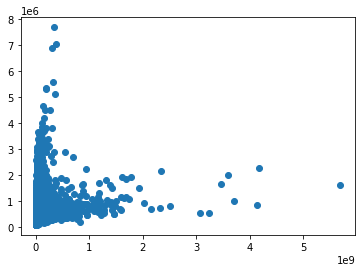

In [79]:
plt.scatter(df['sqft_living_lot'], df['price'])

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [80]:
# your code here

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [81]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,lat_long,yr_renovated2,month,year,yrs_since_built,yrs_since_reno,yrs_btwn_built_reno,property_age,has_basement,grade_exp,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040,zipcode#98119,zipcode#98105,zipcode#98006,zipcode#98005,grade#1,grade#3,grade#4,grade#5,grade#6,grade#7,grade#8,grade#9,grade#10,grade#11,grade#12,grade#13,yrs_since_sold,sqft_living_lot
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,47.4388,-122.162,2390,7700,"(47.4388, -122.162)",1986,10,2014,34,34,0,28,0,2980.957987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,18408510
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,"(47.6784, -122.285)",1977,8,2014,43,43,0,37,1,2980.957987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,19517000
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,47.5646,-122.129,3710,9685,"(47.5646, -122.129)",1997,8,2014,23,23,0,17,0,59874.141715,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,6,41066610
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,47.6995,-122.228,4050,14226,"(47.6995, -122.228)",1990,3,2015,30,30,0,25,0,162754.791419,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,66612480
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,47.6647,-122.083,2250,4050,"(47.6647, -122.083)",2004,7,2014,16,16,0,10,0,8103.083928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,6,13708800


In [82]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'lat_long', 'yr_renovated2',
       'month', 'year', 'yrs_since_built', 'yrs_since_reno',
       'yrs_btwn_built_reno', 'property_age', 'has_basement', 'grade_exp',
       'zipcode#98004', 'zipcode#98102', 'zipcode#98109', 'zipcode#98112',
       'zipcode#98039', 'zipcode#98040', 'zipcode#98119', 'zipcode#98105',
       'zipcode#98006', 'zipcode#98005', 'grade#1', 'grade#3', 'grade#4',
       'grade#5', 'grade#6', 'grade#7', 'grade#8', 'grade#9', 'grade#10',
       'grade#11', 'grade#12', 'grade#13', 'yrs_since_sold',
       'sqft_living_lot'],
      dtype='object')

In [83]:
sample_features = ['bedrooms','sqft_living_lot','grade#11', 'grade#12', 
                   'grade#13','zipcode#98004', 'zipcode#98102', 'zipcode#98109', 
                   'zipcode#98112',]

In [84]:
#your code here 
main_features = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 
                 'floors', 'waterfront', 'view', 'condition', 'grade','grade_exp',
                 'has_basement','property_age' ,'zipcode#98004', 
                 'zipcode#98102', 'zipcode#98109', 'zipcode#98112','zipcode#98039',
                 'zipcode#98040', 'zipcode#98119', 'zipcode#98105', 'zipcode#98006',
                 'zipcode#98005']

In [85]:
features = main_features

In [86]:
len(features)

22

In [87]:
df[features].isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
grade_exp        0
has_basement     0
property_age     0
zipcode#98004    0
zipcode#98102    0
zipcode#98109    0
zipcode#98112    0
zipcode#98039    0
zipcode#98040    0
zipcode#98119    0
zipcode#98105    0
zipcode#98006    0
zipcode#98005    0
dtype: int64

In [88]:
#import train_test_split from sklearn package
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['price'], random_state=75,test_size=0.2)

print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 22) Target:  (13832,)
Training set - Features:  (3458, 22) Target:  (3458,)


### 5.2) Fit your scaler to training the data.

In [90]:
#your code here 

In [91]:
scaler = StandardScaler()

#fit the scaler and transform the training data
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=df[features].columns)

### 5.3) Transform the testing set with the scaler.

In [92]:
#your code here 
#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df[features].columns)

### 5.4) Fit the model to the training data.

In [93]:
#your code here 

In [94]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 184861.95944579804


### 5.5) Use the model to predict on the training set and the test set.

In [95]:
#your code here 

In [96]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

### 5.6) Evaluate the training and test predictions using RMSE.

In [97]:
#your code here 
#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


Testing Root Mean Squared Error: 171187.7382414704


### 5.7) Determine if your model is overfit.

In [98]:
#your code here 
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))
print ("R^2 Score:", lm.score(X_train, y_train))

Training:  184861 vs. Testing:  171187
R^2 Score: 0.7649952247628762


/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


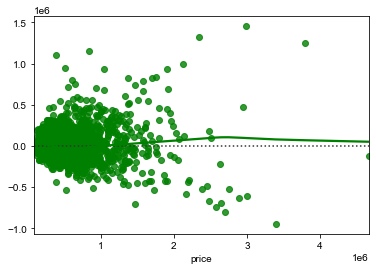

In [99]:
sns.residplot( y_test, y_test_pred,lowess=True, color="g")
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [100]:
#take the natural log of the target variable
y_log = np.log(y_train)

#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log = lm_log.fit(X_train, y_log)

log_train_pred = lm_log.predict(X_train)

#log_train_pred the predictions to get them on the same original scale 
y_train_pred = np.exp(log_train_pred)


train_rmse = np.sqrt(metrics.mean_squared_error(y_train, log_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 664512.959675023


## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

### Polynomial 2

In [101]:
# your code here - Polynomial-2

poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df[features])
poly2_columns = poly_2.get_feature_names(features)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,grade_exp,has_basement,property_age,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040,zipcode#98119,zipcode#98105,zipcode#98006,zipcode#98005,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bedrooms view,bedrooms condition,bedrooms grade,bedrooms grade_exp,bedrooms has_basement,bedrooms property_age,bedrooms zipcode#98004,bedrooms zipcode#98102,bedrooms zipcode#98109,bedrooms zipcode#98112,bedrooms zipcode#98039,bedrooms zipcode#98040,bedrooms zipcode#98119,bedrooms zipcode#98105,bedrooms zipcode#98006,bedrooms zipcode#98005,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,bathrooms view,...,zipcode#98004 zipcode#98040,zipcode#98004 zipcode#98119,zipcode#98004 zipcode#98105,zipcode#98004 zipcode#98006,zipcode#98004 zipcode#98005,zipcode#98102^2,zipcode#98102 zipcode#98109,zipcode#98102 zipcode#98112,zipcode#98102 zipcode#98039,zipcode#98102 zipcode#98040,zipcode#98102 zipcode#98119,zipcode#98102 zipcode#98105,zipcode#98102 zipcode#98006,zipcode#98102 zipcode#98005,zipcode#98109^2,zipcode#98109 zipcode#98112,zipcode#98109 zipcode#98039,zipcode#98109 zipcode#98040,zipcode#98109 zipcode#98119,zipcode#98109 zipcode#98105,zipcode#98109 zipcode#98006,zipcode#98109 zipcode#98005,zipcode#98112^2,zipcode#98112 zipcode#98039,zipcode#98112 zipcode#98040,zipcode#98112 zipcode#98119,zipcode#98112 zipcode#98105,zipcode#98112 zipcode#98006,zipcode#98112 zipcode#98005,zipcode#98039^2,zipcode#98039 zipcode#98040,zipcode#98039 zipcode#98119,zipcode#98039 zipcode#98105,zipcode#98039 zipcode#98006,zipcode#98039 zipcode#98005,zipcode#98040^2,zipcode#98040 zipcode#98119,zipcode#98040 zipcode#98105,zipcode#98040 zipcode#98006,zipcode#98040 zipcode#98005,zipcode#98119^2,zipcode#98119 zipcode#98105,zipcode#98119 zipcode#98006,zipcode#98119 zipcode#98005,zipcode#98105^2,zipcode#98105 zipcode#98006,zipcode#98105 zipcode#98005,zipcode#98006^2,zipcode#98006 zipcode#98005,zipcode#98005^2
0,4.0,2.25,2070.0,8893.0,2.0,0.0,0.0,4.0,8.0,2980.957987,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,9.0,8280.0,35572.0,8.0,0.0,0.0,16.0,32.0,11923.831948,0.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0625,4657.5,20009.25,4.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,3.00,2900.0,6730.0,1.0,0.0,0.0,5.0,8.0,2980.957987,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,15.0,14500.0,33650.0,5.0,0.0,0.0,25.0,40.0,14904.789935,5.0,185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0000,8700.0,20190.00,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,2.50,3770.0,10893.0,2.0,0.0,2.0,3.0,11.0,59874.141715,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.0,10.0,15080.0,43572.0,8.0,0.0,8.0,12.0,44.0,239496.566861,0.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,6.2500,9425.0,27232.50,5.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.0,3.50,4560.0,14608.0,2.0,0.0,2.0,3.0,12.0,162754.791419,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,10.5,13680.0,43824.0,6.0,0.0,6.0,9.0,36.0,488264.374257,0.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.2500,15960.0,51128.00,7.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,2.50,2550.0,5376.0,2.0,0.0,0.0,3.0,9.0,8103.083928,0.0,10.0,0

In [102]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, df['price'], random_state=75,test_size=0.2)

In [103]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 154365.536459833


In [104]:
# use fitted model to predict on test data
y_pred = lm_2.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 170464.62701055256
Training:  154365 vs. Testing:  170464


### Kbest

In [105]:
X_train.shape

(13832, 275)

In [106]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=200)

selector.fit(X_train, y_train)

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k=200, score_func=<function f_regression at 0x7f937c3eb598>)

In [107]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [108]:
list(removed_columns)

['condition',
 'property_age',
 'zipcode#98109',
 'zipcode#98005',
 'bedrooms zipcode#98005',
 'bathrooms zipcode#98005',
 'sqft_lot^2',
 'sqft_lot property_age',
 'sqft_lot zipcode#98005',
 'floors zipcode#98005',
 'waterfront zipcode#98102',
 'waterfront zipcode#98109',
 'waterfront zipcode#98112',
 'waterfront zipcode#98039',
 'waterfront zipcode#98119',
 'waterfront zipcode#98006',
 'waterfront zipcode#98005',
 'view zipcode#98005',
 'condition^2',
 'condition property_age',
 'condition zipcode#98005',
 'grade zipcode#98005',
 'grade_exp zipcode#98005',
 'has_basement zipcode#98109',
 'has_basement zipcode#98005',
 'property_age^2',
 'property_age zipcode#98109',
 'property_age zipcode#98005',
 'zipcode#98004 zipcode#98102',
 'zipcode#98004 zipcode#98109',
 'zipcode#98004 zipcode#98112',
 'zipcode#98004 zipcode#98039',
 'zipcode#98004 zipcode#98040',
 'zipcode#98004 zipcode#98119',
 'zipcode#98004 zipcode#98105',
 'zipcode#98004 zipcode#98006',
 'zipcode#98004 zipcode#98005',
 'zip

In [109]:
list(selected_columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'grade',
 'grade_exp',
 'has_basement',
 'zipcode#98004',
 'zipcode#98102',
 'zipcode#98112',
 'zipcode#98039',
 'zipcode#98040',
 'zipcode#98119',
 'zipcode#98105',
 'zipcode#98006',
 'bedrooms^2',
 'bedrooms bathrooms',
 'bedrooms sqft_living',
 'bedrooms sqft_lot',
 'bedrooms floors',
 'bedrooms waterfront',
 'bedrooms view',
 'bedrooms condition',
 'bedrooms grade',
 'bedrooms grade_exp',
 'bedrooms has_basement',
 'bedrooms property_age',
 'bedrooms zipcode#98004',
 'bedrooms zipcode#98102',
 'bedrooms zipcode#98109',
 'bedrooms zipcode#98112',
 'bedrooms zipcode#98039',
 'bedrooms zipcode#98040',
 'bedrooms zipcode#98119',
 'bedrooms zipcode#98105',
 'bedrooms zipcode#98006',
 'bathrooms^2',
 'bathrooms sqft_living',
 'bathrooms sqft_lot',
 'bathrooms floors',
 'bathrooms waterfront',
 'bathrooms view',
 'bathrooms condition',
 'bathrooms grade',
 'bathrooms grade_exp',
 'bathrooms has_bas

In [110]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


Training Root Mean Squared Error: 155913.046386376
Testing Root Mean Squared Error: 172072.99061162805


In [111]:
# list(zip(selected_columns, lm_kbest.coef_))

In [112]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n')

Original:  170464.62701055256 
 KBest:    172072.99061162805 



### Kbest2

In [113]:
X_train.shape

(13832, 275)

In [114]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=20)

selector.fit(X_train, y_train)

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k=20, score_func=<function f_regression at 0x7f937c3eb598>)

In [115]:
selected_columns2 = X_train.columns[selector.get_support()]
removed_columns2 = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [116]:
list(removed_columns2)

['bedrooms',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'has_basement',
 'property_age',
 'zipcode#98004',
 'zipcode#98102',
 'zipcode#98109',
 'zipcode#98112',
 'zipcode#98039',
 'zipcode#98040',
 'zipcode#98119',
 'zipcode#98105',
 'zipcode#98006',
 'zipcode#98005',
 'bedrooms^2',
 'bedrooms bathrooms',
 'bedrooms sqft_lot',
 'bedrooms floors',
 'bedrooms waterfront',
 'bedrooms view',
 'bedrooms condition',
 'bedrooms has_basement',
 'bedrooms property_age',
 'bedrooms zipcode#98004',
 'bedrooms zipcode#98102',
 'bedrooms zipcode#98109',
 'bedrooms zipcode#98112',
 'bedrooms zipcode#98039',
 'bedrooms zipcode#98040',
 'bedrooms zipcode#98119',
 'bedrooms zipcode#98105',
 'bedrooms zipcode#98006',
 'bedrooms zipcode#98005',
 'bathrooms sqft_lot',
 'bathrooms floors',
 'bathrooms waterfront',
 'bathrooms view',
 'bathrooms condition',
 'bathrooms has_basement',
 'bathrooms property_age',
 'bathrooms zipcode#98004',
 'bathrooms zipcode#98102',
 'bathrooms zipcode#98

In [117]:
list(selected_columns2)

['bathrooms',
 'sqft_living',
 'grade',
 'grade_exp',
 'bedrooms sqft_living',
 'bedrooms grade',
 'bedrooms grade_exp',
 'bathrooms^2',
 'bathrooms sqft_living',
 'bathrooms grade',
 'bathrooms grade_exp',
 'sqft_living^2',
 'sqft_living floors',
 'sqft_living condition',
 'sqft_living grade',
 'sqft_living grade_exp',
 'floors grade_exp',
 'condition grade_exp',
 'grade^2',
 'grade grade_exp']

In [157]:
len(selected_columns2)

20

In [118]:
#instantiate a linear regression object
lm_kbest2 = LinearRegression()

#fit the linear regression to the data
lm_kbest2.fit(X_train[selected_columns2], y_train)

y_train_kbest2 = lm_kbest2.predict(X_train[selected_columns2])


trainK_rmse2 = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest2))


print('Training Root Mean Squared Error:' , trainK_rmse2)

y_kbest2 = lm_kbest2.predict(X_test[selected_columns2])

testK_rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y_kbest2))

print('Testing Root Mean Squared Error:' , testK_rmse2)


Training Root Mean Squared Error: 228183.06682261248
Testing Root Mean Squared Error: 222897.96596007588


In [119]:
# list(zip(selected_columns, lm_kbest.coef_))

In [120]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n',
      "KBest2:   ", testK_rmse2,'\n')

Original:  170464.62701055256 
 KBest:    172072.99061162805 
 KBest2:    222897.96596007588 



### VIF

In [121]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor


# [variance_inflation_factor(df[features].values, i) for i in range(df[features].shape[1])]

# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(df[features].values, i) for i in range(df[features].shape[1])]
# vif["features"] = df[features].columns
# vif.round(1)

In [122]:
# vif.sort_values(by='VIF Factor', ascending=False)

### RFE

In [123]:
len(selected_columns)

200

In [124]:
from sklearn.feature_selection import RFECV

ols = LinearRegression()

# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train[selected_columns], y_train)

Fitting estimator with 200 features.
Fitting estimator with 198 features.
Fitting estimator with 196 features.
Fitting estimator with 194 features.
Fitting estimator with 192 features.
Fitting estimator with 190 features.
Fitting estimator with 188 features.
Fitting estimator with 186 features.
Fitting estimator with 184 features.
Fitting estimator with 182 features.
Fitting estimator with 180 features.
Fitting estimator with 178 features.
Fitting estimator with 176 features.
Fitting estimator with 174 features.
Fitting estimator with 172 features.
Fitting estimator with 170 features.
Fitting estimator with 168 features.
Fitting estimator with 166 features.
Fitting estimator with 164 features.
Fitting estimator with 162 features.
Fitting estimator with 160 features.
Fitting estimator with 158 features.


RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error', step=2, verbose=1)

In [125]:
selected_rfe = X_train[selected_columns].columns[selector.support_]
removed_rfe = X_train[selected_columns].columns[~selector.support_]


In [126]:
list(removed_rfe)

['sqft_living',
 'sqft_lot',
 'grade_exp',
 'bedrooms sqft_living',
 'bedrooms sqft_lot',
 'bedrooms grade_exp',
 'bathrooms sqft_living',
 'bathrooms sqft_lot',
 'bathrooms grade_exp',
 'sqft_living^2',
 'sqft_living sqft_lot',
 'sqft_living floors',
 'sqft_living view',
 'sqft_living condition',
 'sqft_living grade_exp',
 'sqft_living property_age',
 'sqft_lot floors',
 'sqft_lot waterfront',
 'sqft_lot view',
 'sqft_lot condition',
 'sqft_lot grade',
 'sqft_lot grade_exp',
 'sqft_lot has_basement',
 'sqft_lot zipcode#98004',
 'sqft_lot zipcode#98039',
 'sqft_lot zipcode#98040',
 'sqft_lot zipcode#98006',
 'floors grade_exp',
 'waterfront grade_exp',
 'view grade_exp',
 'condition grade_exp',
 'grade grade_exp',
 'grade_exp^2',
 'grade_exp has_basement',
 'grade_exp property_age',
 'grade_exp zipcode#98004',
 'grade_exp zipcode#98102',
 'grade_exp zipcode#98109',
 'grade_exp zipcode#98112',
 'grade_exp zipcode#98039',
 'grade_exp zipcode#98040',
 'grade_exp zipcode#98119',
 'grade_ex

In [127]:
print(len(list(selected_rfe)))
selected_rfe

156


Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade',
       'has_basement', 'zipcode#98004', 'zipcode#98102', 'zipcode#98112',
       ...
       'property_age zipcode#98105', 'property_age zipcode#98006',
       'zipcode#98004^2', 'zipcode#98102^2', 'zipcode#98112^2',
       'zipcode#98039^2', 'zipcode#98040^2', 'zipcode#98119^2',
       'zipcode#98105^2', 'zipcode#98006^2'],
      dtype='object', length=156)

In [128]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


Training Root Mean Squared Error: 158833.34835909214
Testing Root Mean Squared Error: 160432.35866811618


In [129]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n',
      "KBest2:   ", testK_rmse2,'\n',
      "RFE:     ", testRFE_rmse)

Original:  170464.62701055256 
 KBest:    172072.99061162805 
 KBest2:    222897.96596007588 
 RFE:      160432.35866811618


### Lasso

In [130]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)
# The larger the alpha, the higher the penalty and will push more coefficients down to zero.
#Lasso adds a penalty to large coefficient, so in order for a coefficient to be large, the benefit it adds to the model needs to outweigh that penalty in the loss function
#So a coef will only be big if it does well at predicting the dependent variable

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse_lasso01 = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )


Training Error: 110009.17991425142
Testing Error: 169855.23808774332


/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165752807642747.4, tolerance: 201142293225.56476
  positive)


<AxesSubplot:title={'center':'Modal Coefficients'}>

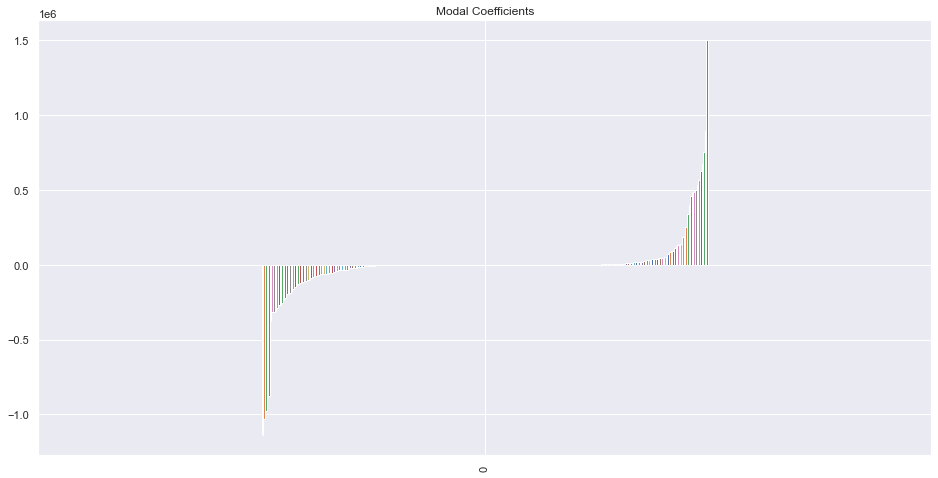

In [131]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [132]:
coeff_df = lasso_coef01.T

coeff_df[coeff_df[0]==0].count()

0    50
dtype: int64

In [133]:
coeff_df[coeff_df[0]==0]

,0
zipcode#98112 zipcode#98006,0.0
waterfront zipcode#98112,0.0
zipcode#98039 zipcode#98040,0.0
zipcode#98006 zipcode#98005,0.0
waterfront zipcode#98005,0.0
zipcode#98112 zipcode#98005,0.0
zipcode#98040 zipcode#98005,0.0
zipcode#98039 zipcode#98119,0.0
zipcode#98039 zipcode#98105,0.0
zipcode#98039 zipcode#98006,0.0


In [134]:
print('Original: \t', test_rmse, '\n',
      "KBest: \t", testK_rmse, '\n',
      "KBest2: \t", testK_rmse2,'\n',
      "RFE: \t \t", testRFE_rmse, '\n', 
      "Lasso 0.01: \t",  test_rmse_lasso01, '\n')

Original: 	 170464.62701055256 
 KBest: 	 172072.99061162805 
 KBest2: 	 222897.96596007588 
 RFE: 	 	 160432.35866811618 
 Lasso 0.01: 	 169855.23808774332 



### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [135]:
# your code here


## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

In [136]:
final_scaler = StandardScaler()


#fit and transform the training data
df_final_scaled = pd.DataFrame(data=final_scaler.fit_transform(df_poly2[selected_rfe]), columns=selected_rfe)

In [137]:
df_final_scaled

,bedrooms,bathrooms,floors,waterfront,view,grade,has_basement,zipcode#98004,zipcode#98102,zipcode#98112,zipcode#98039,zipcode#98040,zipcode#98119,zipcode#98105,zipcode#98006,bedrooms^2,bedrooms bathrooms,bedrooms floors,bedrooms waterfront,bedrooms view,bedrooms condition,bedrooms grade,bedrooms has_basement,bedrooms property_age,bedrooms zipcode#98004,bedrooms zipcode#98102,bedrooms zipcode#98109,bedrooms zipcode#98112,bedrooms zipcode#98039,bedrooms zipcode#98040,bedrooms zipcode#98119,bedrooms zipcode#98105,bedrooms zipcode#98006,bathrooms^2,bathrooms floors,bathrooms waterfront,bathrooms view,bathrooms condition,bathrooms grade,bathrooms has_basement,bathrooms property_age,bathrooms zipcode#98004,bathrooms zipcode#98102,bathrooms zipcode#98109,bathrooms zipcode#98112,bathrooms zipcode#98039,bathrooms zipcode#98040,bathrooms zipcode#98119,bathrooms zipcode#98105,bathrooms zipcode#98006,...,view zipcode#98006,condition grade,condition has_basement,condition zipcode#98004,condition zipcode#98102,condition zipcode#98109,condition zipcode#98112,condition zipcode#98039,condition zipcode#98040,condition zipcode#98119,condition zipcode#98105,condition zipcode#98006,grade^2,grade has_basement,grade property_age,grade zipcode#98004,grade zipcode#98102,grade zipcode#98109,grade zipcode#98112,grade zipcode#98039,grade zipcode#98040,grade zipcode#98119,grade zipcode#98105,grade zipcode#98006,has_basement^2,has_basement property_age,has_basement zipcode#98004,has_basement zipcode#98102,has_basement zipcode#98112,has_basement zipcode#98039,has_basement zipcode#98040,has_basement zipcode#98119,has_basement zipcode#98105,has_basement zipcode#98006,property_age zipcode#98004,property_age zipcode#98102,property_age zipcode#98112,property_age zipcode#98039,property_age zipcode#98040,property_age zipcode#98119,property_age zipcode#98105,property_age zipcode#98006,zipcode#98004^2,zipcode#98102^2,zipcode#98112^2,zipcode#98039^2,zipcode#98040^2,zipcode#98119^2,zipcode#98105^2,zipcode#98006^2
0,0.690062,0.179189,0.945804,-0.089698,-0.307685,0.294186,-0.805717,-0.117889,-0.06818,-0.112476,-0.049346,-0.115855,-0.093234,-0.099649,-0.150912,0.561072,0.358426,1.166689,-0.085301,-0.293665,1.159010,0.623368,-0.760962,-0.290603,-0.114094,-0.063574,-0.067057,-0.107083,-0.048141,-0.113162,-0.08883,-0.093316,-0.146971,0.002308,0.552246,-0.083379,-0.280123,0.671478,0.149666,-0.736921,-0.301151,-0.110469,-0.062121,-0.065245,-0.104665,-0.045081,-0.110073,-0.08638,-0.093469,-0.143930,...,-0.066689,1.039771,-0.780833,-0.115978,-0.066915,-0.068765,-0.109799,-0.048664,-0.113949,-0.091593,-0.097435,-0.147847,0.210075,-0.792330,-0.453224,-0.116276,-0.067393,-0.069602,-0.111287,-0.048581,-0.114541,-0.092478,-0.098603,-0.149190,-0.805717,-0.649874,-0.079651,-0.053311,-0.090999,-0.034031,-0.086021,-0.075887,-0.081828,-0.110347,-0.103945,-0.057022,-0.099094,-0.041861,-0.107151,-0.080335,-0.092008,-0.135596,-0.117889,-0.06818,-0.112476,-0.049346,-0.115855,-0.093234,-0.099649,-0.150912
1,1.786678,1.152641,-0.909850,-0.089698,-0.307685,0.294186,1.241131,-0.117889,-0.06818,-0.112476,-0.049346,-0.115855,-0.093234,-0.099649,-0.150912,1.887625,1.779787,-0.045185,-0.085301,-0.293665,3.477983,1.482226,1.956983,0.406127,-0.114094,-0.063574,-0.067057,-0.107083,-0.048141,-0.113162,-0.08883,-0.093316,-0.146971,1.059480,-0.170720,-0.083379,-0.280123,2.833883,0.877866,1.740097,0.527450,-0.110469,-0.062121,-0.065245,-0.104665,-0.045081,-0.110073,-0.08638,-0.093469,-0.143930,...,-0.066689,2.421855,2.040727,-0.115978,-0.066915,-0.068765,-0.109799,-0.048664,-0.113949,-0.091593,-0.097435,-0.147847,0.210075,1.292020,-0.105124,-0.116276,-0.067393,-0.069602,-0.111287,-0.048581,-0.114541,-0.092478,-0.098603,-0.149190,1.241131,0.580724,-0.079651,-0.053311,-0.090999,-0.034031,-0.086021,-0.075887,-0.081828,-0.110347,-0.103945,-0.057022,-0.099094,-0.041861,-0.107151,-0.080335,-0.092008,-0.135596,-0.117889,-0.06818,-0.112476,-0.049346,-0.115855,-0.093234,-0.099649,-0.150912
2,0.690062,0.503673,0.945

In [138]:
#instantiate a linear regression object
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm_rfe.fit(df_final_scaled, df['price'])

In [139]:
lm_final.score(df_final_scaled, df['price'])

0.8201658224955742

In [152]:
list(selected_rfe)

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'grade',
 'has_basement',
 'zipcode#98004',
 'zipcode#98102',
 'zipcode#98112',
 'zipcode#98039',
 'zipcode#98040',
 'zipcode#98119',
 'zipcode#98105',
 'zipcode#98006',
 'bedrooms^2',
 'bedrooms bathrooms',
 'bedrooms floors',
 'bedrooms waterfront',
 'bedrooms view',
 'bedrooms condition',
 'bedrooms grade',
 'bedrooms has_basement',
 'bedrooms property_age',
 'bedrooms zipcode#98004',
 'bedrooms zipcode#98102',
 'bedrooms zipcode#98109',
 'bedrooms zipcode#98112',
 'bedrooms zipcode#98039',
 'bedrooms zipcode#98040',
 'bedrooms zipcode#98119',
 'bedrooms zipcode#98105',
 'bedrooms zipcode#98006',
 'bathrooms^2',
 'bathrooms floors',
 'bathrooms waterfront',
 'bathrooms view',
 'bathrooms condition',
 'bathrooms grade',
 'bathrooms has_basement',
 'bathrooms property_age',
 'bathrooms zipcode#98004',
 'bathrooms zipcode#98102',
 'bathrooms zipcode#98109',
 'bathrooms zipcode#98112',
 'bathrooms zipcode#98039',
 'bathrooms

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [145]:
import pickle


pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

In [146]:
pickle_out = open('scaler.pickle', "wb")
pickle.dump(final_scaler, pickle_out)
pickle_out.close()

In [147]:
# with open("regression_model_rfe.pickle", "wb") as model:
#     pickle.dump(lm_final, model)

# with open("scalar_rfe.pickle", "wb") as transform:
#     pickle.dump(final_scalar, transform)

In [155]:
pd.DataFrame(selected_rfe).to_csv('selected_rfe.csv')

In [158]:
df_poly2.shape

(17290, 275)